In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

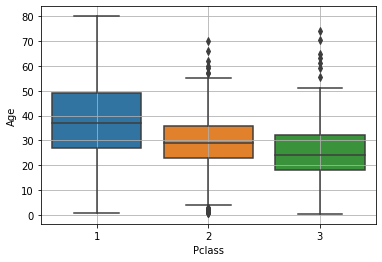

In [5]:
sns.boxplot(data=df,x='Pclass',y='Age')
plt.grid(True)

In [6]:
def fillage(cols):
    age = cols[0]
    pclass = cols[1]
    
    if (pd.isnull(age)):
        if(pclass==1):
            return 37
        elif(pclass==2):
            return 29
        else:
            return 24
    else:
        return age

In [7]:
df['Age']= df[['Age','Pclass']].apply(fillage,axis=1)

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,6])],remainder='passthrough')

In [16]:
x = np.array(ct.fit_transform(x))

In [17]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [18]:
x[0]

array([ 0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  3.  , 22.  ,  1.  ,  0.  ,
        7.25])

In [19]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [20]:
#Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
ypred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
print(f"Accuracy : {accuracy_score(ytest,ypred)}")

Accuracy : 0.8430493273542601


In [23]:
#comparing accuracy with knn model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 0.7040358744394619


Accuracy : [0.7085201793721974, 0.695067264573991, 0.726457399103139, 0.7040358744394619, 0.7219730941704036, 0.6995515695067265, 0.7040358744394619, 0.6816143497757847, 0.6905829596412556, 0.672645739910314, 0.7085201793721974, 0.6816143497757847, 0.7085201793721974, 0.7040358744394619, 0.7130044843049327, 0.7085201793721974, 0.6905829596412556, 0.7085201793721974, 0.6860986547085202, 0.6860986547085202, 0.6860986547085202, 0.6681614349775785, 0.6681614349775785, 0.6771300448430493, 0.6547085201793722, 0.6547085201793722, 0.6547085201793722, 0.6502242152466368, 0.6681614349775785, 0.6547085201793722]


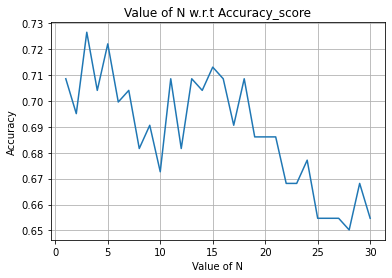

In [25]:
accuracy = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
  
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)
print('Accuracy :',accuracy)

plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t Accuracy_score')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 0.726457399103139


In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)*100}")

Accuracy -: 84.30493273542601


# Hyperparameter tunning

In [28]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
print(f"Accuracy -: {accuracy_score(ytest,ypred)*100}")

Accuracy -: 84.30493273542601


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       138
           1       0.80      0.79      0.79        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223

[[121  17]
 [ 18  67]]


In [30]:
#second data set

In [31]:
df = pd.read_csv("Breast_Cancer.csv")
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [32]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.20,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 1.0


Accuracy : [0.9708029197080292, 0.948905109489051, 0.9854014598540146, 0.9781021897810219, 0.9927007299270073, 0.9927007299270073, 1.0, 0.9854014598540146, 0.9927007299270073, 0.9927007299270073, 0.9927007299270073, 0.9854014598540146, 0.9927007299270073, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9781021897810219, 0.9854014598540146, 0.9781021897810219, 0.9854014598540146, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219]


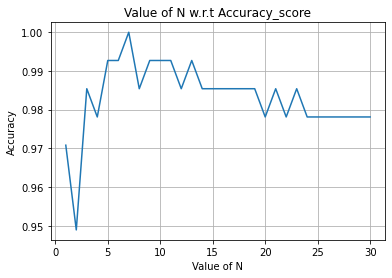

In [34]:
accuracy = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
  
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)
print('Accuracy :',accuracy)

plt.plot(range(1,31),accuracy)
plt.title('Value of N w.r.t Accuracy_score')
plt.xlabel('Value of N')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)}")

Accuracy -: 0.9854014598540146


In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

from sklearn.metrics import accuracy_score
print(f"Accuracy -: {accuracy_score(ytest,ypred)*100}")

Accuracy -: 98.54014598540147


In [37]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)
print(f"Accuracy -: {accuracy_score(ytest,ypred)*100}")

Accuracy -: 98.54014598540147


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           2       0.98      1.00      0.99        90
           4       1.00      0.96      0.98        47

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

[[90  0]
 [ 2 45]]
